In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [4]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breast-cancer.csv')
df.head()

Saving breast-cancer.csv to breast-cancer (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
# Step 3: Data Preprocessing
df.info()
df.isnull().sum()

# Encode categorical target variable
le = LabelEncoder()
# df['Class'] = le.fit_transform(df['Class'])  # Benign=0, Malignant=1
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # Benign=0, Malignant=1
df.rename(columns={'diagnosis': 'Class'}, inplace=True)

# Split features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Step 4: SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

print("🔹 Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

🔹 Linear SVM Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
# tep 5: SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("🔹 RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

🔹 RBF SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
# Step 6: Hyperparameter Tuning (RBF Kernel)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train_scaled, y_train)

print("🔍 Best Parameters:", grid.best_params_)
print("✅ Best Score:", grid.best_score_)

# Evaluate on test set
y_pred_best = grid.predict(X_test_scaled)
print("📊 Accuracy after tuning:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
🔍 Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Best Score: 0.9736263736263737
📊 Accuracy after tuning: 0.9824561403508771


In [10]:
# ✅ Step 7: Cross-Validation
cv_scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5)
print("🌀 Cross-Validation Accuracy Scores:", cv_scores)
print("📈 Mean CV Accuracy:", cv_scores.mean())


🌀 Cross-Validation Accuracy Scores: [0.98901099 0.96703297 0.98901099 0.97802198 0.94505495]
📈 Mean CV Accuracy: 0.9736263736263737


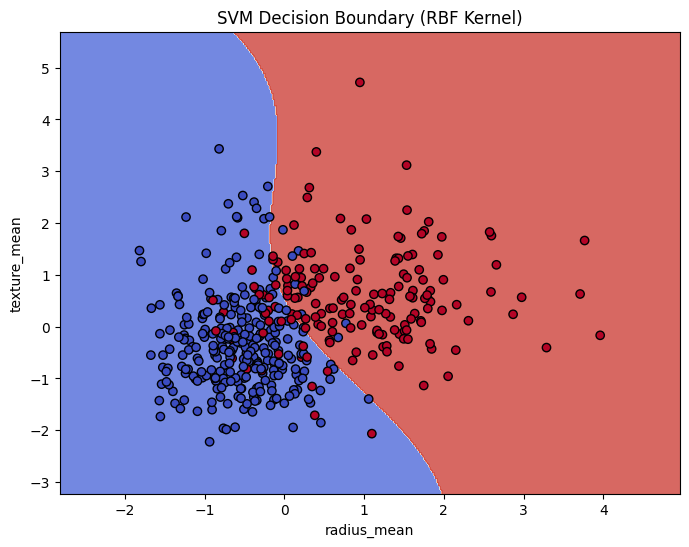

In [19]:
# Step 8: Visualization (only with 2D features)
# ✅ Select two features from your dataset
feature1 = 'radius_mean'
feature2 = 'texture_mean'

X_vis = df[[feature1, feature2]]
y_vis = df['Class']

# ✅ Split the data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# ✅ Standardize the features
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# ✅ Train SVM model on 2D data
svm_vis = SVC(kernel='rbf', C=1, gamma=0.1)
svm_vis.fit(X_train_vis_scaled, y_train_vis)

# ✅ Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(title)
    plt.show()

# ✅ Plotting decision boundary
plot_decision_boundary(svm_vis, X_train_vis_scaled, y_train_vis, "SVM Decision Boundary (RBF Kernel)")
